# Campo de gravidade

Notebook que mostrará o campo de gravidade para o mundo inteiro a partir de modelos geopotenciais que podem ser baixados gratuitamente. 

## Descrição do campo de gravidade

A gravidade medida é definida como o módulo da aceleração da gravidade em um determinado ponto próxima a superfície terrestre, que é igual ao módulo do gradiente do potencial de gravidade. O potencial de gravidade inclui duas componentes, uma componente gravitacional e outra centrífuga. A componente gravitacional é devido à atração gravitacional das massas que compõem a Terra e a componente centrífuga devido à rotação da terra. Matematicamente, isto é representado como:

$$ W(P) = V(P) + \Phi(P), $$
em que $W(P)$ é o potencial de gravidade em um ponto P próximo a superfície terrestre, $V(P)$ é o potencial gravitacional e $\Phi(P)$ é o potencial centrífugo. Portanto, o campo de gravidade terrestre é dado por:

$$ \mathbf{g}(P) = \mathbf{\nabla}V(P) + \mathbf{\nabla} \Phi(P), $$
que é o que chamamos de **vetor de gravidade**. O módulo deste vetor, ou seja, $ \parallel \mathbf{g}(P) \parallel$ é o que chamamos de **gravidade**. A gravidade é dada em  $mGal$ (miligal), em que $ 1 \, mGal = 10^5 \, m/s^{2}$. 



## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados de gravidade.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm
import cartopy.crs as ccrs

## Carregando os dados do modelo geopotencial XGM2019e

Dados baixados do [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [2]:
fname = 'dataset/earth_gravity_XGM2019e.gdf'
data = hm.load_icgem_gdf(fname)

In [3]:
fname = 'dataset/geoid_XGM2019e.gdf'
geoid = hm.load_icgem_gdf(fname)

### Armazenando os dados em um array

In [4]:
lat = data.latitude
lon = data.longitude
gravity = data.gravity_earth
geoidal_height = geoid.geoid

### Campo de gravidade para o mundo inteiro

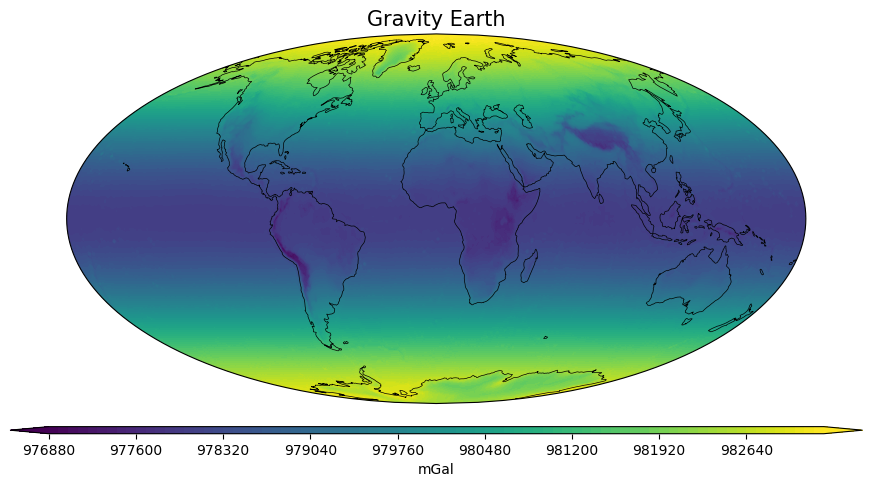

In [5]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Gravity Earth',fontsize=15)
cmap = ax.contourf(lon,lat,gravity,100,transform=ccrs.PlateCarree(),cmap='viridis',extend='both')
cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
cbar.set_label('mGal',fontsize=10)

plt.savefig('images/gravity_earth.png',dpi=200,bbox_inches='tight')
plt.show()

## Superfície geoidal

O geoide é uma **superfície equipotencial** (*i.e.*, onde o potencial de gravidade é constante), que representa o nível médio dos oceanos não perturbados, e se extende para o interior dos continentes. Este é um conceito chave para a geodésia física (ciência que estuda a figura da Terra através da gravidade) e serve como superfície de referência em algumas aplicações.

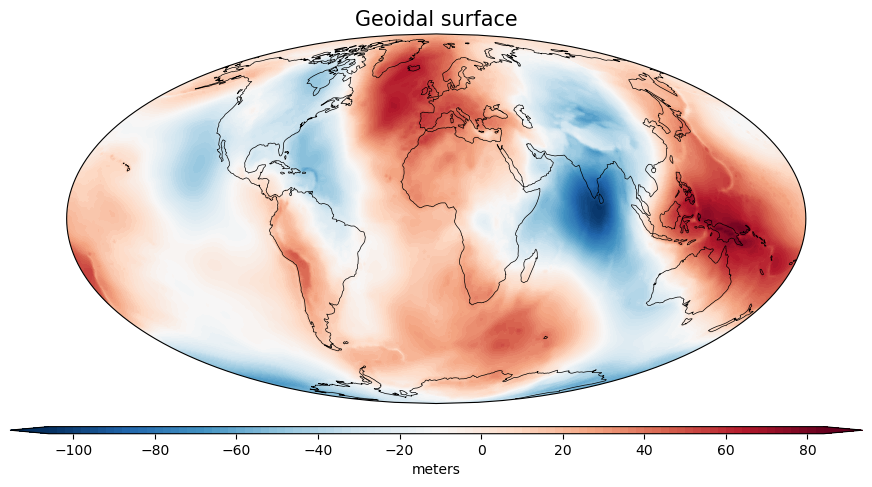

In [6]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Geoidal surface',fontsize=15)
cmap = ax.contourf(lon,lat,geoidal_height,100,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
cbar.set_label('meters',fontsize=10)

plt.savefig('images/geoidal_surface.png',dpi=200,bbox_inches='tight')
plt.show()